In [1]:
!pip install tensorflow


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models,layers

In [3]:
BATCH_SIZE=32
IMAGE_SIZE=256
EPOCHS=50
CHANNELS=3

In [8]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=True
    
)

Found 2152 files belonging to 3 classes.


In [17]:
class_names=dataset.class_names

In [18]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 2 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1]


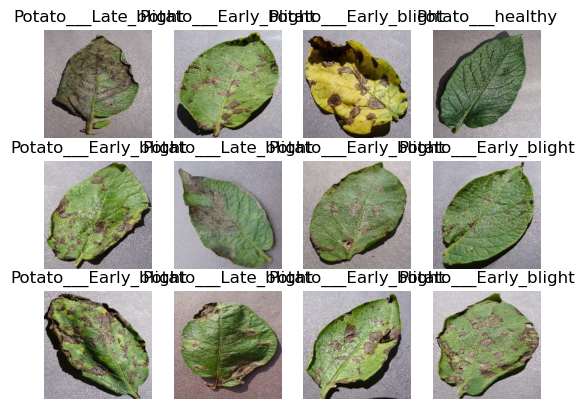

In [26]:
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [32]:
len(dataset)   
# 2152(total image)/32(batch size)


68

In [38]:
# this will give you the splitted dataset 
# train=>0.8,test=>0.1.val=>0.1

def get_splitted_dataset(ds=dataset,train_size=0.8,test_size=0.1,val_size=0.1,shuffle=True,seed=12):
    if shuffle:
        ds=ds.shuffle(10000,seed=seed)
    ds_size=len(ds)
    train_ds=ds.take(int(train_size*ds_size))
    val_ds=ds.skip(int(train_size*ds_size)).take(int(val_size*ds_size))
    test_ds=ds.skip(int(train_size*ds_size)).skip(int(val_size*ds_size))

    return train_ds,val_ds,test_ds


In [40]:
train_ds,val_ds,test_ds=get_splitted_dataset()
print(len(train_ds))
print(len(val_ds))
print(len(test_ds))

54
6
8


In [41]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [42]:
# these layers will be used in actual model 

resizing_and_rescaling_layer=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1./255)
])

data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])